# exploring the data cleaning the anime data and finding out the genres

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data = pd.read_csv("MALratings.csv")

In [6]:
data

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN
...,...,...,...,...,...,...,...,...
20338,Steins;Gate,"Drama,Sci-Fi,Suspense",4,13,9.08,24,24 min. per ep.,Spring 2011
20339,High Score,"Comedy,Slice of Life",10527,6095,5.58,8,3 min. per ep.,Fall 2011
20340,Noraneko,NaN,8706,5064,6.04,1,35 sec.,NaN
20341,"Suki de Suki de, Suki de The Animation",NaN,/A,5329,6.81,2,27 min. per ep.,NaN


In [7]:
data.head()

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN


In [8]:
data.isnull()

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
20338,False,False,False,False,False,False,False,False
20339,False,False,False,False,False,False,False,False
20340,False,True,False,False,False,False,False,True
20341,False,True,False,False,False,False,False,True


<Axes: >

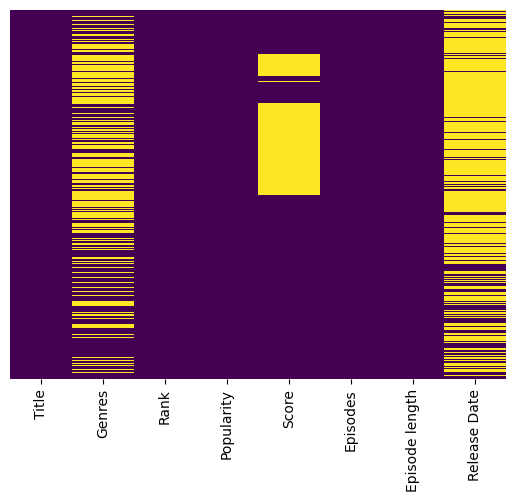

In [11]:
sns.heatmap(data.isnull() , yticklabels = False , cbar=False ,cmap= 'viridis' )

In [35]:
#create bins 
score_bins = [0, 7.0, 8.0, 10.0]
score_labels = ['Bad', 'Average', 'Good']

In [36]:

data['Score_binned'] = pd.cut(data['Score'], bins=score_bins, labels=score_labels, include_lowest=True)

In [37]:

print(data[['Score', 'Score_binned']])

       Score Score_binned
0       8.99         Good
1       8.96         Good
2       8.93         Good
3       8.99         Good
4       8.96         Good
...      ...          ...
20338   9.08         Good
20339   5.58          Bad
20340   6.04          Bad
20341   6.81          Bad
20342   6.12          Bad

[19828 rows x 2 columns]


In [38]:
print(data['Score_binned'].value_counts())

Score_binned
Bad        9940
Average    3440
Good        556
Name: count, dtype: int64


In [39]:
score_counts = data['Score_binned'].value_counts()


In [40]:
labels = score_counts.index
counts = score_counts.values

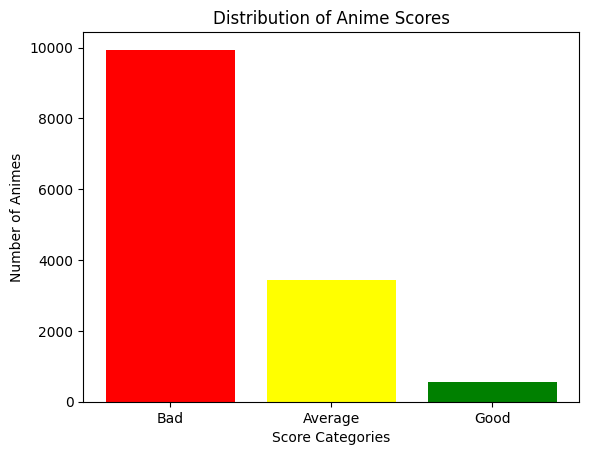

In [41]:
plt.bar(labels, counts, color=['red', 'yellow', 'green'])  # Adjust colors as necessary
plt.xlabel('Score Categories')
plt.ylabel('Number of Animes')
plt.title('Distribution of Anime Scores')
plt.show()

In [42]:
bins = np.linspace(min(data['Popularity']), max(data['Popularity']),4)
bins

array([1.00000000e+00, 6.78366667e+03, 1.35663333e+04, 2.03490000e+04])

In [43]:

group_names = ['Low', 'Medium', 'High']

In [44]:
data['Popularity-binned']= pd.cut(data['Popularity'],bins,labels=group_names , include_lowest=True)

In [45]:
data[['Popularity','Popularity-binned']].head(20)

,Popularity,Popularity-binned
0,404,Low
1,533,Low
2,939,Low
3,735,Low
4,19,Low
5,2505,Low
6,17,Low
7,127,Low
8,700,Low
9,763,Low


In [46]:



data['Popularity-binned'].value_counts()

Popularity-binned
Low       6674
Medium    6619
High      6535
Name: count, dtype: int64

<BarContainer object of 3 artists>

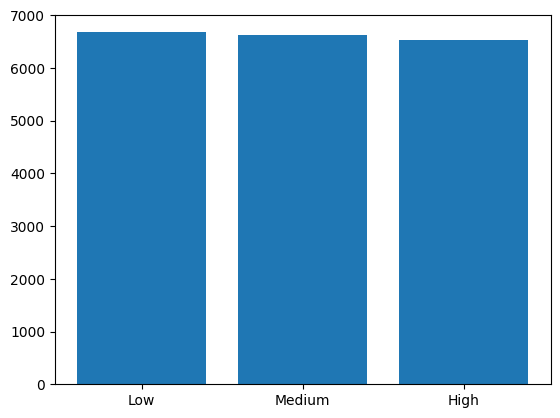

In [47]:
plt.bar(group_names, data['Popularity-binned'].value_counts())

In [48]:
print(data['Score'].describe())
print(data['Popularity'].describe())

count    13936.000000
mean         6.450700
std          0.906703
min          1.840000
25%          5.830000
50%          6.460000
75%          7.110000
max          9.140000
Name: Score, dtype: float64
count    19828.000000
mean     10116.118318
std       5860.160551
min          1.000000
25%       5036.000000
50%      10108.500000
75%      15180.250000
max      20349.000000
Name: Popularity, dtype: float64


In [49]:
# Convert 'Episodes' to numeric, setting errors='coerce' will convert 'unknown' to NaN
data['Episodes'] = pd.to_numeric(data['Episodes'], errors='coerce')

In [50]:
data.dropna(subset=['Episodes'], inplace=True)

In [51]:
# Verify the drop
print(data['Episodes'].head())

0    12.0
1    22.0
2     1.0
3    12.0
4     1.0
Name: Episodes, dtype: float64


In [52]:
bins = np.linspace(start = min(data['Episodes']),stop = max(data['Episodes']),num=4)
bins

array([1.00000000e+00, 1.01966667e+03, 2.03833333e+03, 3.05700000e+03])

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19828 entries, 0 to 20342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              19828 non-null  object  
 1   Genres             9731 non-null   object  
 2   Rank               19828 non-null  object  
 3   Popularity         19828 non-null  int64   
 4   Score              13936 non-null  float64 
 5   Episodes           19828 non-null  float64 
 6   Episode length     19828 non-null  object  
 7   Release Date       4956 non-null   object  
 8   Episodes_binned    19776 non-null  category
 9   Score_binned       13936 non-null  category
 10  Popularity-binned  19828 non-null  category
dtypes: category(3), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [54]:
# Define custom bins for episodes
episode_bins = [0, 12, 24, 50, 100, 300]  # Adjust bins as needed
episode_labels = ['0-12', '13-24', '25-50', '51-100', '101-300']

In [55]:
# Create a new column 'Episodes_binned'
data['Episodes_binned'] = pd.cut(data['Episodes'], bins= episode_bins, labels=episode_labels, include_lowest=True)

In [56]:
# Calculate the average popularity for each episode bin
popularity_by_episodes = data.groupby('Episodes_binned')['Popularity'].mean()

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_29552\3382008216.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_episodes = data.groupby('Episodes_binned')['Popularity'].mean()


In [57]:
print(popularity_by_episodes)

Episodes_binned
0-12       10174.771990
13-24       7459.538981
25-50      10388.046850
51-100     12771.322148
101-300    11723.465217
Name: Popularity, dtype: float64


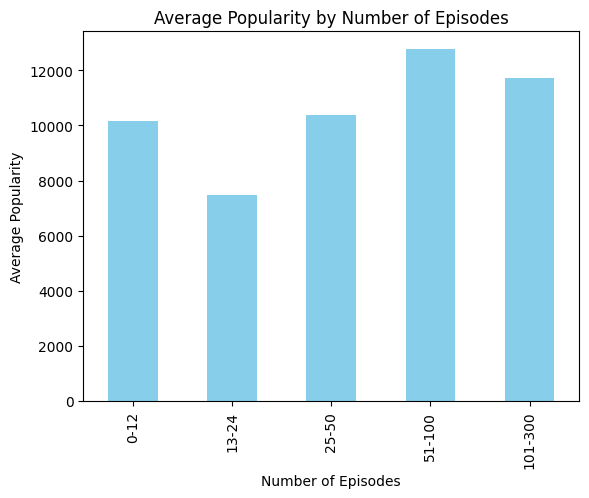

In [58]:
# Plotting the average popularity for each episode bin

popularity_by_episodes.plot(kind="bar", color='skyblue')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Number of Episodes')
plt.show()

In [59]:
# Group by 'Episodes_binned' and 'Score_binned' and calculate mean popularity
popularity_by_episodes_and_score = data.groupby(['Episodes_binned', 'Score_binned'])['Popularity'].mean().unstack()

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_29552\2320172996.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_episodes_and_score = data.groupby(['Episodes_binned', 'Score_binned'])['Popularity'].mean().unstack()


In [60]:
print(popularity_by_episodes_and_score)

Score_binned              Bad      Average         Good
Episodes_binned                                        
0-12              8991.036153  3695.919011  1434.529595
13-24             6634.689498  2537.346154  1205.297297
25-50             8958.483923  4247.819820   962.714286
51-100            8973.843750  5040.138462  1467.380952
101-300          10041.581818  3323.851064   473.454545


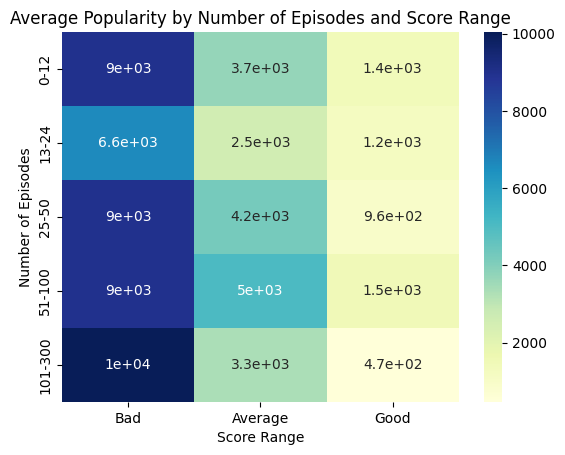

In [64]:

sns.heatmap(popularity_by_episodes_and_score, annot=True, cmap="YlGnBu")
plt.xlabel('Score Range')
plt.ylabel('Number of Episodes')
plt.title('Average Popularity by Number of Episodes and Score Range')
plt.show()

# Implementation
## The number of episodes and score range are both crucial factors influencing an anime's popularity.
## There might be a preference among viewers for shorter anime or anime with a specific range of episodes.
## The combination of high scores and longer episodes does not always correlate with higher popularity.

In [70]:
data.info()
                   

<class 'pandas.core.frame.DataFrame'>
Index: 19828 entries, 0 to 20342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              19828 non-null  object  
 1   Genres             9731 non-null   object  
 2   Rank               19828 non-null  object  
 3   Popularity         19828 non-null  int64   
 4   Score              13936 non-null  float64 
 5   Episodes           19828 non-null  float64 
 6   Episode length     19828 non-null  object  
 7   Release Date       4956 non-null   object  
 8   Episodes_binned    19776 non-null  category
 9   Score_binned       13936 non-null  category
 10  Popularity-binned  19828 non-null  category
dtypes: category(3), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [72]:
#convert rank to numbers 
data['Rank'] = pd.to_numeric(data['Rank'] , errors='coerce')

In [73]:
#drop all the nan valus or row 
data.dropna(subset=['Rank'] , inplace=True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18278 entries, 0 to 20342
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              18278 non-null  object  
 1   Genres             9322 non-null   object  
 2   Rank               18278 non-null  float64 
 3   Popularity         18278 non-null  int64   
 4   Score              12516 non-null  float64 
 5   Episodes           18278 non-null  float64 
 6   Episode length     18278 non-null  object  
 7   Release Date       4951 non-null   object  
 8   Episodes_binned    18226 non-null  category
 9   Score_binned       12516 non-null  category
 10  Popularity-binned  18278 non-null  category
dtypes: category(3), float64(3), int64(1), object(4)
memory usage: 1.3+ MB


In [93]:
rank_bins = [0, 100, 500, 1000, max(data['Rank'])]
rank_labels= ['Top' , 'High' , 'medium', 'low']

In [94]:
data["Rank-binned"] = pd.cut(data['Rank'] , bins=rank_bins , labels=rank_labels , include_lowest=True)

In [95]:
print(data["Rank-binned"])

0        Top
1        Top
2        Top
3        Top
4        Top
        ... 
20337    low
20338    Top
20339    low
20340    low
20342    low
Name: Rank-binned, Length: 18278, dtype: category
Categories (4, object): ['Top' < 'High' < 'medium' < 'low']


In [96]:
data['Rank-binned'].value_counts()

Rank-binned
low       17284
medium      498
High        397
Top          99
Name: count, dtype: int64

In [97]:
population_of_rank = data.groupby('Rank-binned') ['Popularity'].mean()

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_29552\402024622.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_of_rank = data.groupby('Rank-binned') ['Popularity'].mean()


In [98]:
print(population_of_rank)

Rank-binned
Top         617.656566
High       1410.916877
medium     2169.688755
low       10792.921025
Name: Popularity, dtype: float64


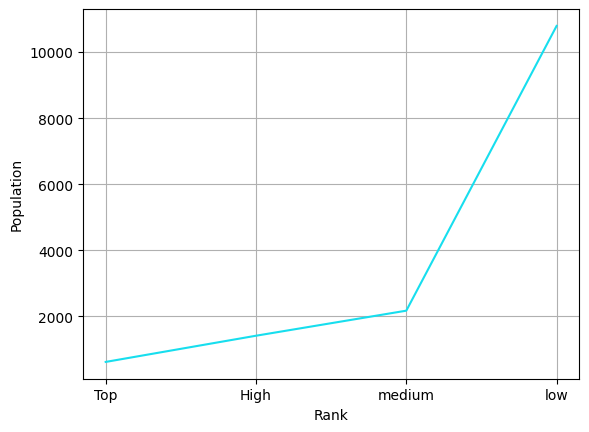

In [106]:
plt.plot(population_of_rank  , color='#17DEEE')
plt.xlabel("Rank")
plt.ylabel("Population")
plt.grid()
plt.show()

In [107]:
popularity_of_rank_episodes = data.groupby(['Rank-binned' , 'Episodes_binned'])['Popularity'].mean().unstack()

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_29552\2326496803.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_of_rank_episodes = data.groupby(['Rank-binned' , 'Episodes_binned'])['Popularity'].mean().unstack()


In [108]:
print(popularity_of_rank_episodes)

Episodes_binned          0-12        13-24         25-50        51-100  \
Rank-binned                                                              
Top                704.211538   448.952381    722.777778    250.800000   
High              1542.930131  1372.848101    994.584615   1847.562500   
medium            2288.952830  1820.627907   2090.553846   2505.153846   
low              10821.736604  8207.641614  11168.150059  13202.534884   

Episodes_binned       101-300  
Rank-binned                    
Top                279.000000  
High               589.000000  
medium            1565.076923  
low              12903.821256  


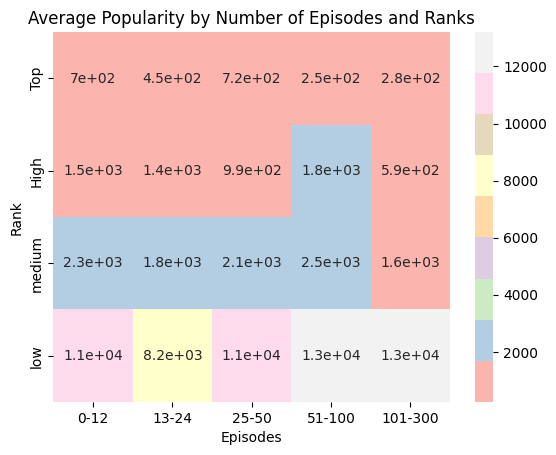

In [114]:
sns.heatmap(popularity_of_rank_episodes , annot=True , cmap='Pastel1' , cbar=True)
plt.xlabel('Episodes')
plt.ylabel('Rank')
plt.title('Average Popularity by Number of Episodes and Ranks')
plt.show()

## Conclusion:
Anime with fewer episodes tend to have higher popularity, particularly in the lower rank category.
The medium rank category shows a significant drop in popularity as the number of episodes increases.
The top rank category has a more consistent but lower popularity across different episode ranges.
This heatmap helps identify trends in popularity based on the number of episodes and ranking, providing valuable insights for further analysis or decision-making regarding anime content